# Prepare data for analysis

In [36]:
# Load packages 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from ete3 import Tree
import os

Read in landmark data and phylogeny

In [46]:
treefile = 'data/chazot_full_tree.nw'
wing = 'forewing'
file = f'data/Morpho_{wing}_procCoor.txt' 

In [47]:
data =  pd.read_csv(file, sep="\t", index_col=False)
with open(treefile, 'r') as file: 
        newick_tree = file.read()
bphylogeny = Tree(newick_tree)

In [48]:
print(bphylogeny)


      /-eugenia
   /-|
  |   \-marcus
  |
  |         /-anaxibia
  |      /-|
  |     |  |   /-cypris
  |     |   \-|
  |     |      \-rhetenor
  |   /-|
--|  |  |      /-cisseis
  |  |  |   /-|
  |  |  |  |   \-hecuba
  |  |  |  |
  |  |   \-|      /-niepelti
  |  |     |   /-|
  |  |     |  |   \-theseus
  |  |      \-|
  |  |        |   /-hercules
   \-|         \-|
     |           |   /-amphitryon
     |            \-|
     |               \-telemachus
     |
     |   /-polyphemus
     |  |
     |  |         /-granadensis
     |  |      /-|
     |  |     |  |   /-achilles
     |  |     |   \-|
      \-|   /-|      \-helenor
        |  |  |
        |  |  |   /-deidamia
        |  |   \-|
        |  |     |   /-epistrophus
        |  |      \-|
        |  |         \-iphitus
         \-|
           |      /-amathonte
           |   /-|
           |  |  |   /-godartii
           |  |   \-|
           |  |      \-menelaus
           |  |
            \-|      /-zephyritis
            

In [43]:
# get all the species names in the right order 
leaves_string = []
for leaf in bphylogeny: 
    leaves_string.append(leaf.name)

Select landmark data only for male butterflies

In [74]:
leaves_data=[]
landmark_sele =[0, 1, 19, 20, 21, 22, 23, 34, 36, 38, 40, 42, 17, 16, 33, 31, 29, 27, 25, 24]
male_data = data.loc[data['sex']=='M']

In [75]:
 # select only male butterflies
for leaf in leaves_string:
    indices = np.where(male_data.species==leaves_string[0])
    cur_specimen = male_data.iloc[indices[0],:]
    cur_leaf = np.mean(np.array(cur_specimen.iloc[:,8::]), axis=0) 
    #indices = np.where(data.species==leaf)
    #cur_specimen = data.iloc[indices[0],:]
    #selected = data.iloc[indices[0][0],:]
    #selected.loc['ProcCoord1'::] = selected.loc['ProcCoord1'::]*5
    #species = selected.species
    #cur_leaf = np.array(selected.iloc[8::])
    leaves_data.append(np.array(list(zip(cur_leaf[::2][landmark_sele], cur_leaf[1::2][landmark_sele]))).flatten())

In [77]:
dataframe = pd.DataFrame(np.array(leaves_data).T, columns=leaves_string)
pd.DataFrame.to_csv(dataframe, 'forewing_data_male.csv', index=False)

# Visualize wings in chazot data

In [84]:
forewing = np.array(pd.read_csv('data/forewing_data_male.csv', delimiter=','))

0
[-0.732626   0.7544295 -0.8169385  0.6375925 -0.7727935  0.3746025
 -0.6870345  0.2053865 -0.604715  -0.0362655 -0.555983  -0.296413
 -0.4918955 -0.541412  -0.2899185 -0.654261  -0.026343  -0.605556
  0.2290765 -0.556826   0.488224  -0.524409   0.747343  -0.5157745
  0.9642765 -0.461214   1.00083   -0.3677565  0.946041  -0.254698
  0.6804995  0.071974   0.3722965  0.3802325  0.025076   0.629385
 -0.368958   0.762236  -0.569707   0.7789155]
1
[-0.8136525  0.7522785 -0.858333   0.6046195 -0.737606   0.3909485
 -0.6511555  0.220789  -0.552986  -0.0273785 -0.5070915 -0.294389
 -0.4717865 -0.5335735 -0.2909895 -0.632325  -0.0280945 -0.595086
  0.2308675 -0.5562545  0.4919595 -0.535364   0.752793  -0.5277525
  0.9745905 -0.4928315  1.03225   -0.4189965  0.9306295 -0.2654105
  0.653785   0.05225    0.3580025  0.3734775  0.0218995  0.640329
 -0.376816   0.7885955 -0.585422   0.8044165]
2
[-0.7706685  0.7110905 -0.8616655  0.617014  -0.7674015  0.3738235
 -0.657704   0.221039  -0.595173  -0.0

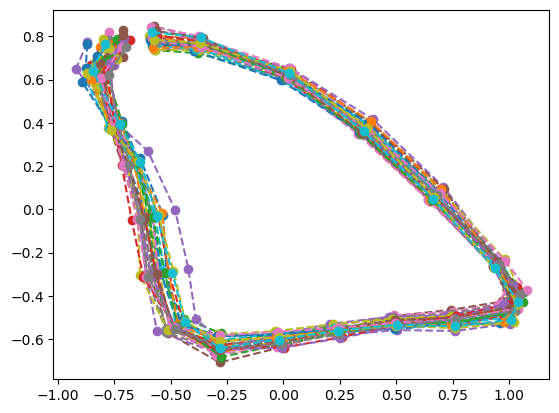

In [80]:
for i in range(forewing.shape[1]):
    print(i)
    wing = forewing[:,i]
    print(wing)
    plt.plot(wing[::2], wing[1::2], '--o')